In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
COLUMNS = [ 'Time(ms)', 'Vib_X_Axis', 'Vib_Y_Axis', 'Vib_Z_Axis', 'PVS']

filtered_list = []
f = open('/Users/dobby/Desktop/Workspace/파형분석 ym/hb/ALW003_ASCII.TXT', 'r')
line = f.readlines()
state = False

for i in line:
    if any(keyword in i for keyword in COLUMNS):
        state = True
    if state:
        filtered_list.append(i.replace("\n", ""))

filtered_list = list(filter(lambda x:x, filtered_list[2:]))

filtered_list

['-0.250   |   -0.02000   |   0.01000    |   0.02000    |    0.03000',
 '-0.249   |   -0.03000   |   0.01000    |   0.02000    |    0.03000',
 '-0.248   |   -0.03000   |   0.01000    |   0.02000    |    0.03000',
 '-0.247   |   -0.03000   |   0.01000    |   0.01000    |    0.03000',
 '-0.246   |   -0.03000   |   0.01000    |   0.01000    |    0.03000',
 '-0.245   |   -0.02000   |   0.01000    |   0.01000    |    0.03000',
 '-0.244   |   -0.02000   |   0.01000    |   0.01000    |    0.02000',
 '-0.243   |   -0.01000   |   0.02000    |   0.01000    |    0.02000',
 '-0.242   |   -0.01000   |   0.02000    |   0.01000    |    0.02000',
 '-0.241   |   -0.01000   |   0.02000    |   0.00000    |    0.02000',
 '-0.240   |   -0.01000   |   0.02000    |   0.00000    |    0.02000',
 '-0.239   |   0.00000   |   0.01000    |   0.00000    |    0.01000',
 '-0.238   |   -0.01000   |   0.01000    |   0.00000    |    0.01000',
 '-0.237   |   -0.01000   |   0.01000    |   -0.01000    |    0.01000',
 '-0.2

In [4]:
d = []
for i in filtered_list:
    tmp = [i.strip() for i in i.split('|') if i != '\n']
    data = {c:i for c, i in zip(COLUMNS, tmp)}
    d.append(data)


In [7]:
df = pd.DataFrame(d)

tm = pd.Series([abs(float(i['Vib_X_Axis'])) for i in d], name='TM')
vm = pd.Series([abs(float(i['Vib_Y_Axis'])) for i in d], name='VM')
lm = pd.Series([abs(float(i['Vib_Z_Axis'])) for i in d], name='LM')

ppv = pd.Series([max(i['Vib_X_Axis'], i['Vib_Y_Axis'], i['Vib_Z_Axis']) for i in d], name='PPV')

df.insert(2, tm.name, tm)
df.insert(4, vm.name, vm)
df.insert(6, lm.name, lm)
df.insert(7, ppv.name, ppv)

df.to_dict(orient='records')

[{'Time(ms)': '-0.250',
  'Vib_X_Axis': '-0.02000',
  'TM': 0.02,
  'Vib_Y_Axis': '0.01000',
  'VM': 0.01,
  'Vib_Z_Axis': '0.02000',
  'LM': 0.02,
  'PPV': '0.02000',
  'PVS': '0.03000'},
 {'Time(ms)': '-0.249',
  'Vib_X_Axis': '-0.03000',
  'TM': 0.03,
  'Vib_Y_Axis': '0.01000',
  'VM': 0.01,
  'Vib_Z_Axis': '0.02000',
  'LM': 0.02,
  'PPV': '0.02000',
  'PVS': '0.03000'},
 {'Time(ms)': '-0.248',
  'Vib_X_Axis': '-0.03000',
  'TM': 0.03,
  'Vib_Y_Axis': '0.01000',
  'VM': 0.01,
  'Vib_Z_Axis': '0.02000',
  'LM': 0.02,
  'PPV': '0.02000',
  'PVS': '0.03000'},
 {'Time(ms)': '-0.247',
  'Vib_X_Axis': '-0.03000',
  'TM': 0.03,
  'Vib_Y_Axis': '0.01000',
  'VM': 0.01,
  'Vib_Z_Axis': '0.01000',
  'LM': 0.01,
  'PPV': '0.01000',
  'PVS': '0.03000'},
 {'Time(ms)': '-0.246',
  'Vib_X_Axis': '-0.03000',
  'TM': 0.03,
  'Vib_Y_Axis': '0.01000',
  'VM': 0.01,
  'Vib_Z_Axis': '0.01000',
  'LM': 0.01,
  'PPV': '0.01000',
  'PVS': '0.03000'},
 {'Time(ms)': '-0.245',
  'Vib_X_Axis': '-0.02000',
  '

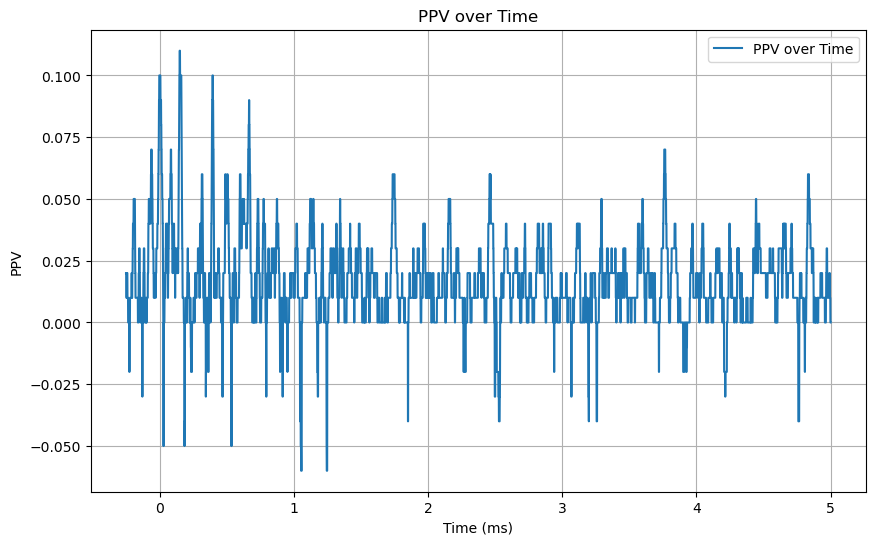